In [1]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [2]:
%config InlineBackend.figure_format = 'retina'

# 0. Note

This example compares pressure calculated from `pytheos` and original publication for the gold scale by Speiale 2001.

# 1. Setup

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import unumpy as unp
import pytheos as eos

# 2. Calculation

Generate volume strain: $V/V_0$.

In [4]:
eta = np.linspace(1., 0.60, 21)
print(eta)

[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6 ]


Assign an EOS object

In [5]:
speziale_mgo = eos.periclase.Speziale2001()

Unit-cell volume of MgO at 1 bar and 300 K:

In [6]:
v0 = 74.698
temp = 300.

Calculate absolute values of unit-cell volumes.

In [7]:
v = v0 * eta 

Now calculate pressures for the given volumes at $T = 300$ K.

In [8]:
p = speziale_mgo.cal_p(v, temp * np.ones_like(v))

In [9]:
print('for T = ', temp)
for eta_i, p_i in zip(eta, p):
    print("{0: .3f} {1: .2f}".format(eta_i, p_i))

for T =  300.0
 1.000  0.00+/-0.00
 0.980  3.37+/-0.00
 0.960  7.09+/-0.00
 0.940  11.22+/-0.00
 0.920  15.78+/-0.01
 0.900  20.83+/-0.01
 0.880  26.44+/-0.02
 0.860  32.66+/-0.03
 0.840  39.57+/-0.04
 0.820  47.27+/-0.05
 0.800  55.84+/-0.07
 0.780  65.41+/-0.09
 0.760  76.11+/-0.11
 0.740  88.09+/-0.15
 0.720  101.53+/-0.19
 0.700  116.65+/-0.24
 0.680  133.69+/-0.29
 0.660  152.94+/-0.37
 0.640  174.74+/-0.46
 0.620  199.50+/-0.56
 0.600  227.72+/-0.70


Calculate volume from pressure: reverse calculation.

In [10]:
v = speziale_mgo.cal_v(p, temp * np.ones_like(p), min_strain=0.6)
print((v/v0))

[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6 ]


Plot pressure versus unit-cell volume.

In [11]:
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp

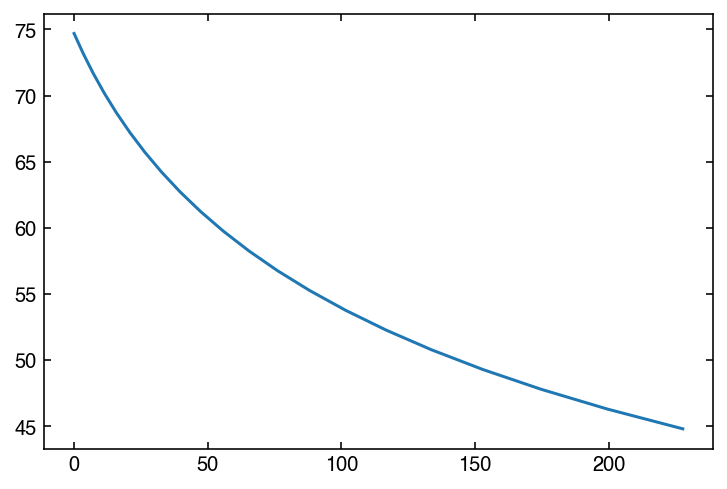

In [12]:
plt.plot(unp.nominal_values(p), v);

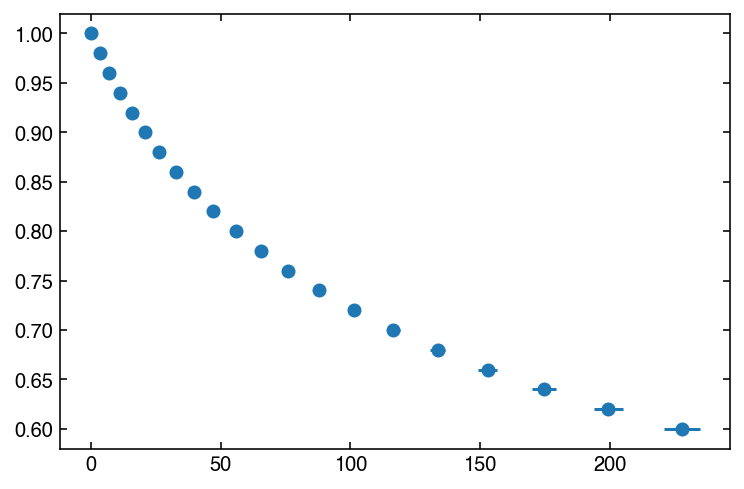

In [13]:
plt.errorbar(unp.nominal_values(p), v/v0, xerr=unp.std_devs(p)*10., fmt='o');